In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  math import cos,sin,pi

#### <center> Data preparation </center>

In [226]:
data = pd.read_csv("Dataset_complete.csv")
data.tail()
data.drop('ranging_unit', axis=1, inplace=True)
data.drop('register_dump_CIR', axis=1, inplace=True)
data.drop('initiator', axis=1, inplace=True)
data.drop('protocol', axis=1, inplace=True)
data.drop('loc_initiator_z', axis=1, inplace=True)


List of fixed sensors:

In [176]:
data["target"].unique()

array([100, 101, 150, 171, 180, 184])

## <center> Generate new data </center>
To train the model, we decide to implement some modifications on the data generating new rows, to generate the new data set we have 2 methods.
First, we modify the origin of the system by re-calculating the coordinates of the initiator and the target.
The second approach is to turn the system around the origin. 
### change System Origin 


In [177]:
#   diff : dataframe source
#   origin : sensors id 

def changeSystemOrigin(dff,origin) :
    df=dff.copy()
    
    x = list(df.loc_target_x[df["target"]==origin])[0]
    y = list(df.loc_target_y[df["target"]==origin])[0]
    
    for index, row in df.iterrows():
        #update coordinates of the new origin
        if(row["target"]==origin):
            df.at[index,"loc_target_x"] =0
            df.at[index,"loc_target_y"]=0
        #re-calculiting new coordinates of the initiator    
        df.at[index,"loc_initiator_x"] = df.at[index,"loc_initiator_x"] -x
        df.at[index,"loc_initiator_y"]= df.at[index,"loc_initiator_y"] -y
        #re-calculiting new coordinates of the target
        df.at[index,"loc_target_x"]= df.at[index,"loc_target_x"] -x
        df.at[index,"loc_target_y"]= df.at[index,"loc_target_y"] -y
    
    return df

In [179]:
def changeSystemOriginPosition(dff,origin) :
    df=dff.copy()
    x = list(df.x[df["node_id"]==origin])[0]
    y = list(df.y[df["node_id"]==origin])[0]
    for index, row in df.iterrows():
        if(row["node_id"]==origin):
             df.at[index,"x"] =0
             df.at[index,"y"]=0
        df.at[index,"x"]= df.at[index,"x"] -x
        df.at[index,"y"]= df.at[index,"y"] -y
    return df

In [180]:
#rotation origine
def rotation(df, angle):
    df_c = df.copy()
    angle_rad = angle * pi / 180
    for index, row in df.iterrows():
        df.at[index,"loc_initiator_x"] = df_c.at[index,"loc_initiator_x"] * cos(angle_rad) - df_c.at[index,"loc_initiator_y"] * sin(angle_rad)
        df.at[index,"loc_initiator_y"] = -df_c.at[index,"loc_initiator_x"] * sin(angle_rad) + df_c.at[index,"loc_initiator_y"]  * cos(angle_rad)
        df.at[index,"loc_target_x"]=  df_c.at[index,"loc_target_x"] * cos(angle_rad) - df_c.at[index,"loc_target_y"] * sin(angle_rad)
        df.at[index,"loc_target_y"] = -df_c.at[index,"loc_target_x"] *  sin(angle_rad) + df_c.at[index,"loc_target_y"] * cos(angle_rad)
    return df

In [181]:
def rotationPosition(df, angle):
    df_c = df.copy()
    angle_rad = angle * pi / 180
    df.x = df_c.x * cos(angle_rad) - df_c.y * sin(angle_rad)
    df.y = -df_c.x * sin(angle_rad) + df_c.y * cos(angle_rad)
    return df

In [182]:
def getoriginOrientation(orientationAngle):
    angle_rad = orientationAngle * pi / 180
    x1=1
    y1=0
    x2=0
    y2=1
    return [[0,0,x1 * cos(angle_rad) - y1 * sin(angle_rad)],[0,0,x1 * sin(angle_rad) + y1 * cos(angle_rad)],[0,0,x2 * cos(angle_rad) - y2 * sin(angle_rad)],[0,0,x2 * sin(angle_rad) + y2 * cos(angle_rad)]]  



In [194]:
position=pd.read_csv("positions.csv")

In [221]:
def plotTrajet(df,position,orientation) :
    fig, ax = plt.subplots()
    ax.plot(list(-df['loc_initiator_x']),list(-df['loc_initiator_y']),label='emetteur')
    ax.set_title("Trajet de l'emetteur")
    plt.xlabel('abscisse')
    plt.ylabel('ordonné')
    x = getoriginOrientation(orientation)
    plt.plot(x[0],x[1],"g",label="X")
    plt.plot(x[2],x[3],"y",label="Y")
    plt.plot(0,0,"^b",label='origine')   
    #plt.xlim(-3,3) 
    #plt.ylim(-3,3) 
    plt.axis('equal')
    plt.plot(-position['x'],-position['y'],"^r",label='capteur')
    plt.legend()
    plt.show()

In [ ]:
plt.xlim(-3,3) 
    plt.xlim(-3,3) 
    plt.axis('equal')
    plt.plot(-position['x'],-position['y'],"^r",label='capteur')
    plt.legend()
    plt.show()

In [195]:
data_test = data.copy()
position_test =position.copy()
data_test[["loc_initiator_x","loc_initiator_y","loc_target_x","loc_target_y"]].head()

,loc_initiator_x,loc_initiator_y,loc_target_x,loc_target_y
0,2.12,2.793,-3.962,7.931
1,2.12,2.793,-3.962,7.931
2,2.12,2.793,-3.962,7.931
3,2.12,2.793,-3.962,7.931
4,2.12,2.793,-3.962,7.931


In [187]:
data_test=changeSystemOrigin(data_test,100)
position_test = changeSystemOriginPosition(position,100)

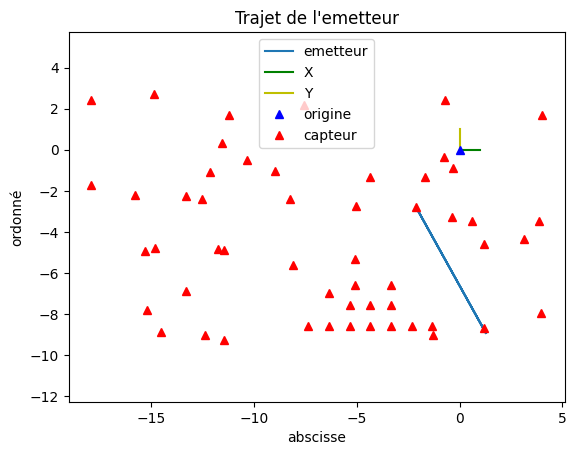

In [222]:

plotTrajet(data_test,position_test,0)

In [189]:
data_test = rotation(data_test,180)
position_test= rotationPosition(position_test,180)


In [53]:
data_test[["loc_initiator_x","loc_initiator_y","loc_target_x","loc_target_y"]].head()

,loc_initiator_x,loc_initiator_y,loc_target_x,loc_target_y
0,-2.12,-2.793,3.962,-7.931
1,-2.12,-2.793,3.962,-7.931
2,-2.12,-2.793,3.962,-7.931
3,-2.12,-2.793,3.962,-7.931
4,-2.12,-2.793,3.962,-7.931


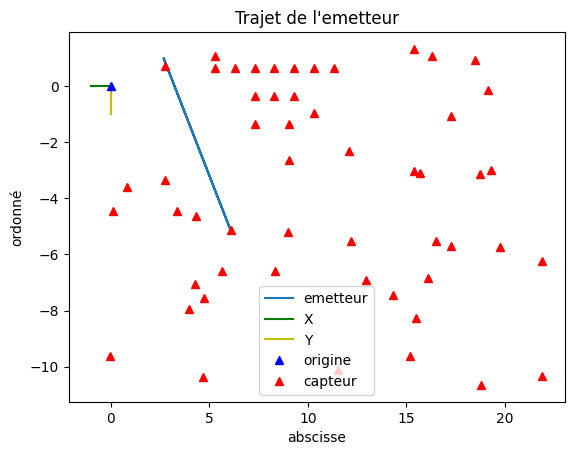

In [191]:
plotTrajet(data_test,position_test,180)

In [212]:
data["origin"]=[0 for i in range(len(data))]
data["rotation"]=[0 for i in range(len(data))]
data_d = data.copy() 

In [209]:
d1=changeSystemOrigin(data_d,100)
d1["origin"]=100
data_d = data.copy() 
d2=changeSystemOrigin(data_d,101)
d2["origin"]=101
data_d = data.copy() 
d3=changeSystemOrigin(data_d,150)
d3["origin"]=150
data_d = data.copy() 
d4=changeSystemOrigin(data_d,171)
d4["origin"]=171
data_d = data.copy() 
d4=changeSystemOrigin(data_d,180)
d4["origin"]=180



In [213]:
t1=rotation(data_d,50)
t1["rotation"]=50
data_d = data.copy() 
t2=rotation(data_d,75)
t2["rotation"]=75
data_d = data.copy() 
t3=rotation(data_d,90)
t3["rotation"]=90
data_d = data.copy() 
t4=rotation(data_d,270)
t4["rotation"]=270
data_d = data.copy() 
t4=rotation(data_d,180)
t4["rotation"]=180

In [214]:
csv_rotation=pd.concat([data,t1,t2,t3,t4],ignore_index=True)
len(csv_rotation)

19730

In [ ]:
plotTrajet()

In [210]:
csv_origin_position=pd.concat([data,d1,d2,d3,d4],ignore_index=True)
len(csv_origin_position)

19730

In [211]:
csv_origin_position.to_csv("origin_position.csv")

In [215]:
csv_rotation.to_csv("rotation.csv")

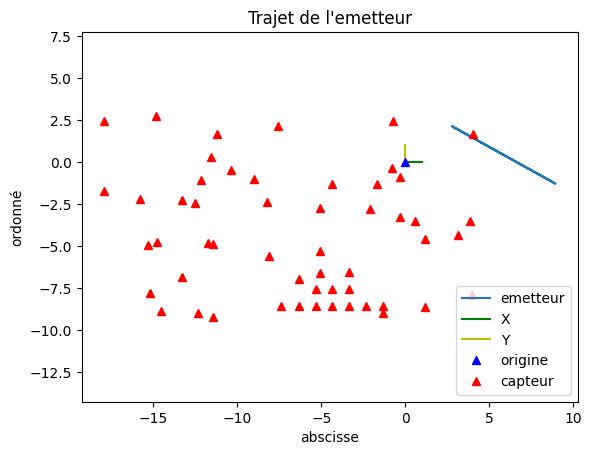

In [225]:
plotTrajet(t3,rotationPosition(position,90),0)

In [220]:
csv_complet=pd.concat([csv_origin_position,csv_rotation],ignore_index=True)
csv_complet.to_csv("complet.csv")